$\newcommand{\bmx}{\large \boldsymbol{x} \normalsize}$
$\newcommand{\bmc}{\large \boldsymbol{c} \normalsize}$
$\newcommand{\bmy}{\large \boldsymbol{y} \normalsize}$
$\newcommand{\bmb}{\large \boldsymbol{b} \normalsize}$

# Empalme con la clase anterior

Hemos visto dos temas de solucion de ecuaciones lineales iterativos:

* Jacobi
* Guss-Seidel

Vamos a ver un tercer que es como un **hibrido** de estos dos. Se llama


### Tecnicas de Relajaxion (relaxation)
Escribimos la idea y en la proxima la retomamos.

Cual es la idea? Recuerden el sistema iterativo general

$$ \bmx_{k+1} = T \bmx_k + \bmc $$

Hasta el momento $T$ puede tener dos "valores". $T_J$ para Jacobi o $T_{GS}$ para Gauss-Seidel

La clave del metodo de relajacion es pensar en una solucion "mejor" buscandola en la linea que une $\bmx_k$ con $\bmx_{k+1}$.

Por que no buscar una "mejor" solucion entre estas dos.
Por ejemplo

$$\bmy = (1 - \omega) \bmx_{k} + \omega \bmx_{k+1} \tag{1} $$

La expresion de la derecha para $\omega \in \mathbb{R}$ es la linea  recta que pasa por los puntos $\bmx_k, \bmx_{k+1}$. El metodo de relajacion busca una mejor solucion en esa linea.  Note que si $\omega=1$, entonces $y=\bmx_{k+1}$ y esto se reduce al problema anterior (sea este Guass-Seidel o Jacobi). Si $\omega=0$, la nueva solucion $\bmy = \bmx_k$, no pasa nada. Estamos estaticos,


Queremos que $\omega>0$ por que?
Podemos escribir la ecuacion (1) como

$$\bmy =  \bmx_k - \omega \bmx_k + \omega \bmx_{k+1} =
\bmx_k + \omega \Delta \bmx_k $$
donde $\Delta \bmx_k = \bmx_{k+1} - \bmx_k$.
Queremos que el delta sea positivo , entonces $\omega > 0$, por que entonces digamos (por convencion) que nos estamos moviendo en la direccion correcta.

Ahora pensemos que $\bmx_{k+1}$ se obtiene mediante el metodo de Gauss-Seidel

$$\bmy = ( 1 - \omega) \bmx_k  + \omega ( T_{GS} \bmx_k +  \bmc )  $$

$$\bmy = ( 1 - \omega) \bmx_k  + \omega  T_{GS} \bmx_k +  \omega  \bmc   $$


De Gauss Seidel, clase anterior.
$$\bmy = ( 1 - \omega) \bmx_k  + \omega  (L+D)^{-1} U \bmx_k +  \omega  (L+D)^{-1} \bmb   $$


De forma granulada (por componentes) pensamos en el vector $x_i^{(k+1)}$ en terminos de la componentes $x_i^(k)}$ para $j \ge i+1$ y $x_i^{(k+1)}$ como $x_j^{(k+1)}$ para $j=1,2, \cdots, i-1$. De esta forma si $\bmy = \bmx_{k+1}$



$$x_i^{(k+1)} = (1 - \omega) x_i^{(k)} + \omega \frac{1}{a_{ii}} \left ( b_i - \sum_{j=1}^{i-1} a_{ij} x_j^{(k+1)} - \sum_{j=i+1}^n a_{ij} x_j^{(k)} \right ) \tag{2} $$

La podemos convertir a otra forma matricial.
Multiplique esto por $a_{ii}$
$$a_{ii} x_i^{(k+1)} = a_{ii} (1 - \omega) x_i^{(k)} + \omega  \left ( b_i - \sum_{j=1}^{i-1} a_{ij} x_j^{(k+1)} - \sum_{j=i+1}^n a_{ij} x_j^{(k)} \right ) \tag{2} $$

Esto se puede llevar a la forma matricial mas facil

$$ D \bmx_{k+1} = D (1 - \omega) \bmx_{k} + \omega \bmb - \omega L \bmx_{k+1} - \omega U \bmx_k $$


$$ (D + \omega L) \bmx_{k+1} = [D (1 - \omega) - \omega U]  \bmx_{k} + \omega \bmb   $$

Puedo multiplicar todo por $(D + \omega L)^{-1}$

$$\bmx_{k+1} = (D + \omega L)^{-1} [ (1- \omega )D - \omega U]  \bmx_k + (D + \omega L)^{-1} \omega \bmb$$

Esta es la recursividad de SOR (Succesive Over Relaxation) donde

$$\bmx_{k+1} = T_{\omega} \bmx_{k} + \bmc  $$
con
$$T_{\omega}= (D + \omega L)^{-1}[ (1- \omega)D - \omega U] \quad \text{,}  \quad  \bmc=(D + \omega L)^{-1} \omega \bmb  $$

Note que si $\omega=1$ la matrix $T_\omega = T_G$.
Queremos que $\rho(T_\omega)<1$. Ideal es que
$\rho(T_{\omega}) < \rho(T_J)$, $\rho(T_{\omega})< \rho(T_{GS})$

Vamos a ver dos cosas:
* Que $0 < \omega < 2$ para que converja. Es necesario pero no suficiente.
* Que si $A$ es positiva definida entonces es suficiente (basta que) $0 < \omega < 2$ para que converja.

Nota: Si $0 < \omega < 1$ se llama "under-relaxation" (subrelajacion) y si $1 < \omega < 2$ hay sobre-relajacion.

**Teorema 1.3.1** (Kahan). Si $a_{ii} \ne 0, i=1,2 \cdots, n$ entonces $\rho(T_\omega) \ge | \omega -1 |$ y esto significa que el SOR converge solo si $0 < \omega < 2$.

**Prueba**: Factorizamos $D$ por fuera de $T_w$.

Recuerden $(AB)^{-1} = B^{-1} A^{-1}$
\begin{eqnarray}
T_{\omega} &=& (D + \omega L)^{-1}[ (1- \omega)D - \omega U]  \\
&=& [(D (I + \omega D^{-1} L)^{-1} [ (1-\omega) D - \omega U] \\
&=& (I + \omega D^{-1} L)^{-1} D^{-1} [(1- \omega) D - \omega U)] \\
&=& (I + \omega D^{-1} L)^{-1} [(1- \omega) I - \omega D^{-1} U)]
\end{eqnarray}

La matriz $D$ es la diagonal y no tiene ceros. Que tiene inversa.

Se puede probar facilmente que si $L$ es triangular inferior con ceros en la diagonal y $D$ es diagonal, entonces $DL$ es triangular inferior con ceros en la diagonal. Tambien
Se puede probar facilmente que si $U$ es triangular superior con ceros en la diagonal y $D$ es diagonal, entonces $DU$ es triangular superior con ceros en la diagonal.

Entonces (explicacion oral)

$$ \det(T_\omega) = (1 - \omega)^n $$
Ahora por definicion

$$\rho(T_\omega) = \max_{1 \le i \le n} \{ | \lambda_i| : \text{autovalres de } A \} $$

El determinante de una matriz es el producto de los autovalores

$$ \det (T_\omega) = \prod_{i=1}^n \lambda_i $$

$$ | \det (T_{\omega}) | \le \rho(T_\omega)^n $$

Lo que estamos diciento es que

$$| \omega -1 | \le \rho(T_\omega) < 1  $$

Desbaratando esta desigualdad

$$ -1 < \omega -1 < 1 $$
Sumando $1$ a todos los lados

$$ 0 < \omega < 2. $$


La segunda parte de lo que dijimos arriba es el

**Teorema 1.3.2** (Ostrowski): Asuma que la matriz $A$ es psitiva definida (por lo tanto simetrica), el sistema $A \bmx = \bmb $ converge si $0 < \omega < 2$.
(suficiente)

**Preuba**: Veamos que $a_{ii}>0$. Por que?
Escoja los vetores canonicos $e_i$ tal que tiene un 1 en la posicion $i$ y cero en las demas. Entonceso

$$e_i^T A e_i = a_{ii} >  0 $$
por que $A$ es positiva definida.
Como es simetrica $U=L^T$. Construimos dos matrices $B$ y $C$ tales que $T_\omega=B^{-1} C$.



$$T_{\omega}= (D + \omega L)^{-1}[ (1- \omega)D - \omega U]$$

$$B = \frac{1}{\omega} (D + \omega L)  \quad , \quad C = \frac{1}{\omega} [(1-\omega) D - \omega L^T] $$

Entonces

\begin{eqnarray}
T_\omega &=&
B^{-1} \left [ \frac{1}{\omega}D -D - L^T  \right ] \\
&=& B^{-1} \left [ \frac{1}{\omega}( D  + \omega L)-L  - L^T  - D \right ] \\
&=& B^{-1} ( B - A) \\
&=& I - B^{-1} A
\end{eqnarray}

Ahora como $A= A^T$,
Recuerden que $(AB)^T = B^T A^T$

\begin{eqnarray}
A - T_{\omega}^T A T_\omega &=& A - (I-B^{-1} A)^T A (I - B^{-1} A ) \\
&=& (B^{-1} A)^T A + A B^{-1} A - (B^{-1} A)^T A B^{-1} A \\
&=& (B^{-1} A)^T A + (A I) B^{-1} A - (B^{-1} A)^T A B^{-1} A \\
&=& (B^{-1} A)^T A + (A^T (B^{-1})^T B^T) B^{-1} A - (B^{-1} A)^T A B^{-1} A \\
&=& (B^{-1} A)^T B B^{-1} A + (B^{-1} A)^T B^T) B^{-1} A - (B^{-1} A)^T A B^{-1} A \\
&=&  (B^{-1} A)^T ( B + B^T - A) B^{-1} A
\end{eqnarray}

De

\begin{eqnarray}
B + B^T - A &=& \frac{1}{\omega} D + L + \frac{1}{\omega} D + U - A \\
&=& \frac{1}{\omega} D + L + \frac{1}{\omega}D + U - L - D - U \\
&=& \frac{1}{\omega} (2 - \omega ) D
\end{eqnarray}

$0 < \omega < 2$, $B^T + B - A$ es simetrica positiva definida.

Entonces $A - T_\omega^T A T_\omega$ es tambien simetrica y positiva definida. Veamos por que

Si $P$ es positiva definida entonces
$Q^T P Q$ es positiva definda. Pues

$$x \in \mathbb{R}^n$, entonces

$$x^T Q^T P Q x = y^T P y > 0  $$
pues $y=Qx$, y como $P$ es positiva definida el producto es $>0$ como esta.

Es decir para tode $\bmx$, autovector de $T_\omega$ con autovalor $\lambda$,

$$\bmx^T ( A - T_\omega^T A T_\omega) \bmx > 0$$
Es decir

Separando esta ecuacion en pedazos
$$\bmx^T T_{\omega} \bmx > (\lambda \bmx)^T T_\omega \lambda \bmx = | \lambda | ^2 \bmx^T T_\omega \bmx  $$
De forma que

Entonces $| \lambda | < 1$ y $\rho(T_\omega)<1$

y por lo tanto el sistema converge.

**Teorema 1.3.3** (Young): Si $0 < \omega < 2$ y $T_J$ tiene autovalres reales con $A$ invertible y $\beta = \rho(T_j) < 1$,  el sistmme de relajacion basado en la iteracion de Gauss-Seidel converge y

$$\rho(T_\omega) =
\begin{cases}
1 - \omega + \frac12 \omega^2 \beta^2 \sqrt{1 - \omega + \frac{\omega^2 \beta^2}{4}} \quad, \quad 0 < \omega < \omega_{opt} \\
\omega -1 \quad \quad , \quad \quad \omega_{opt} < \omega < 2
\end{cases} $$

$$\omega_{opt} = \frac{2}{1  +  \sqrt{1 - \beta^2}}$$
Se deja como tarea probar que $\rho(T_\omega)$ es **continua** en $\omega=\omega_{opt}$.



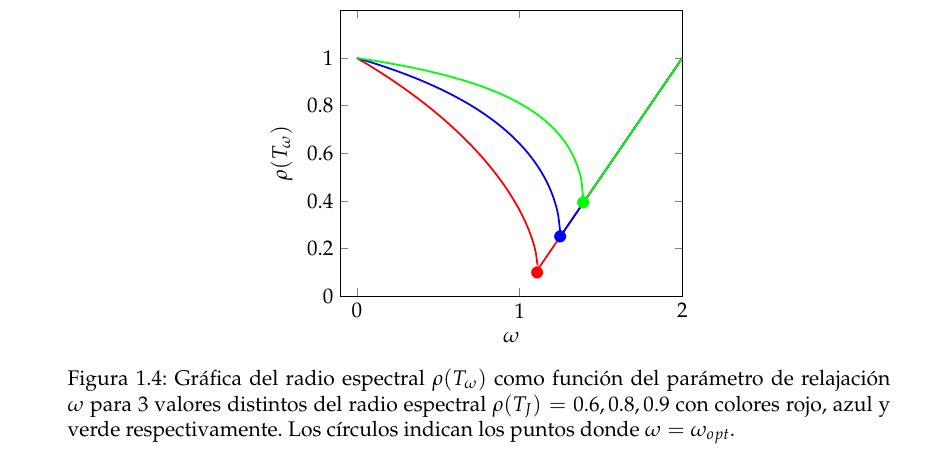

Implementamos la ecuacion (2). Es decir
$$x_i^{(k+1)} = (1 - \omega) x_i^{(k)} + \omega \frac{1}{a_{ii}} \left ( b_i - \sum_{j=1}^{i-1} a_{ij} x_j^{(k+1)} - \sum_{j=i+1}^n a_{ij} x_j^{(k)} \right ) \tag{2} $$

In [1]:
# implementacion del SOR
import numpy as np
from numpy import linalg as LA

def sor(A,b, omega, nmax, tol):
    n = len(b)
    x = np.zeros(n)
    xnew = np.zeros(n)

    k=0
    error=10

    while k < nmax and error > tol:
        for i in range(n):
            S=0
            # salve x en xnew
            xnew[i]=x[i]
            for j in range(n):
                if i != j:
                    S += A[i][j]*x[j]
            x[i] = (1.0 - omega)*x[i] + omega*(b[i]-S)/A[i][i]

        k +=1

        # calculamos el error con la norma 2
        error = LA.norm(x-xnew,2)
        print("solucion x para la iteracion k=%2d con error %5.4f"%(k, error))
        print(x)


    return x, k, error


In [2]:
# prueba
A = np.array( [[5, -2, 3], [-3, 8, 1], [-3, -1,-6]])
b = np.array([-1,4,0])

nmax=100
tol=0.001
omega=1.2
sor(A,b,omega,nmax,tol)

solucion x para la iteracion k= 1 con error 0.5493
[-0.24    0.492   0.0456]
solucion x para la iteracion k= 2 con error 0.2988
[ 0.011328    0.4998576  -0.11588832]
solucion x para la iteracion k= 3 con error 0.0906
[ 0.08110564  0.55390927 -0.13626757]
solucion x para la iteracion k= 4 con error 0.0299
[ 0.10776797  0.55815387 -0.14903804]
solucion x para la iteracion k= 5 con error 0.0072
[ 0.11366765  0.56187538 -0.15076806]
solucion x para la iteracion k= 6 con error 0.0021
[ 0.11551965  0.56222398 -0.15160298]
solucion x para la iteracion k= 7 con error 0.0005
[ 0.11591772  0.56245863 -0.15172176]


(array([ 0.11591772,  0.56245863, -0.15172176]), 7, 0.00047710401311265474)

**Comentarios**:
Este mismo problema:
* Para Jacobi necesita 17 iteraciones
* Para Gauss-Seidel necesita 11 iteraciones
* Para SOR (este codigo) necesita 7



## Metododo iterativo de Jacobi con pesos
Usamos la iteracion

$$\bmy = (1 - \omega) \bmx_k + \omega T_J(\bmx_k) $$
$$\bmy = (1 - \omega) \bmx_k + \omega D^{-1}(L+U) \bmx_k + \omega D^{-1} \bmb. $$
Si $\bmy = \bmx_{k+1}$ entonces

$$\bmx_{k+1} = (1 - \omega) \bmx_k + \omega D^{-1}(L+U) \bmx_k + \omega D^{-1} \bmb. $$

Gilbert Strang ofrece el valor $\omega=2/3$ como optimo para este problema. Pero esto es solo para su informacion y esto no desarrollamos aca.

# Capitulo 2: Solucion numerica de ecuaciones diferenciales parciales mediante el metodo de diferencias finitas.

## Introduccion:
Para que la solucion numerica de ecuaciones diferenciales parciales?

Lo que digo yo es que el 99.9999999 y muchos mas nueves por ciento de los problemas reales no se pueden resolver analiticamente.  De forma que son las soluciones numericas las mas apropiadas para problemas de la vida real.

Existen varios metodos para resolver ecuaciones diferenciales parciales numericamente:

* Diferencias finitas (este curso)
* Elementos finitos (parte de esto esta en las notas de clase pero por fuera del alcance de esta clase)
* Metodo de lineas (por fuera)
* Volumenes finitos (por fuera)

Areas de interes para esta materia:
* Fisica
* Ingenieria
* Economia
* Quimica
* Biologia

En solo fisica hay tambien muchas ramas. Por ejemplo
* Mecanica de fluidos (Navier-Stokes)
* Campos electromagneticos (las ecuaciones de Maxwell, ecuacion de onda)
* Mecanica Cuantica (la de Schrodringer)
* Elasticidad (La ecuacion de onda elastica)

## Taxonomia de Ecuaciones Diferenciales Parciales
Ustedes ya saben que es una derivada parcial.

por ejemplo
$$\frac{\partial^2 u}{\partial x \partial y}= u_{xy} = u,_{12} $$


En general, asumamos $n$ variables independientes $x_1, x_2, \cdots, x_n$, la variable escalar dependiente
$u=u(x_1, x_2, \cdots, x_n)$. Definimos en general la derivada parcial de orden $i_1 + i_2 + \cdots i_n$
como

$$\frac{\partial^{i_1+i_2+ \cdots + i_n} u }{\partial x_1^{i_1} \partial x_2^{i_2} \cdots \partial_{x_n}^{i_n} } = u_{x_1^{i_1} x_2^{i_2} \cdots x_n^{i_n}} = u_{,{1^{i_1} 2^{i_2}, \cdots n^{i_n}}} $$
Done $i_j=0,1,2, \cdots, $, $j=1,2, \cdots, n$.


El grado $i_1 + i_2 + \cdots i_n \ge 1$, sino, no hay ecuacion diferencial (algebraica).


Por ejemplo que pasa si $i_1=1$, $i_2=2$, $i_3=0$ tres variables $x_1, x_2, x_3$

$$\frac{\partial^{i_1+i_2+ \cdots + i_n} u }{\partial x_1^{i_1} \partial x_2^{i_2} \cdots \partial_{x_n}^{i_n} } =
\frac{\partial^3 u}{\partial x_1 \partial x_2^2}
= \frac{\partial^3 u}{\partial x \partial y^2}= u_{x_1 x_2^2} = u_{x y^2} = u_{, 12^2} = u_{,122}$$

Las ecuaciones diferenciales en derivadas paciales en las variables $x_1, x_2, \cdots, x_n$ para la solucion integral $u=u(x_1, x_2, \cdots, x_n)$
se escriben, en general

$$f \left ( x_1, x_2, \cdots, x_n, u,  \frac{\partial^{i_1+i_2+ \cdots + i_n} u }{\partial x_1^{i_1} \partial x_2^{i_2} \cdots \partial_{x_n}^{i_n} }\right ) = 0. $$

Dentro de la gama de ecuaciones diferenciales parciales tenemos las **lineales** de segundo orden que son las que tratamos en esta clase.

$$\sum_{i,j=1}^n A_{ij} u_{,ij} + \sum_{i=1}^n B_i u_{,i} + g(x_1, x_2, \cdots, x_n) = 0 $$

Especial aca es que $A_{ij}$ no puede depender ni de $u$ ni de ninguna de sus derivadas parciales. Lo mismo con $B_i$.

**Ejemplo 2.1.1**: Asuma que $u$ es una funcion de las variables $x,y,t$. Es decir $u=u(x,y,t)$. Consideremos la ecuacion




$$A u_{xx} + B u_{xy} + C u_{xy} + D_{xt} + E u_{yt} + F u_{tt} + G u_x + H u_y + I u_t + g(x,y,t) = 0.$$
donde $A,B, \cdots, I$ son funciones de $(x,y,t)$ solamente. Esta es la ecuacion diferencial de segundo orden mas general (lineal).